In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib as mpl
import joblib
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
# tensorflow 용 시간체크와 tqdm
!pip install tensorflow-addons
import tqdm
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [79]:
vocab_size = 100
embed_size = 10

In [80]:
# 인코더-디코더 모델 정
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
sequence_lengths = keras.layers.Input(shape=[], dtype=np.int32)
embeddings = keras.layers.Embedding(vocab_size, embed_size)
encoder_embeddings = embeddings(encoder_inputs)
decoder_embeddings = embeddings(decoder_inputs)

encoder = keras.layers.LSTM(512, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embeddings)
encoder_state = [state_h, state_c]

sampler = tfa.seq2seq.sampler.TrainingSampler()

decoder_cell = keras.layers.LSTMCell(512)
output_layer = keras.layers.Dense(vocab_size)
decoder = tfa.seq2seq.basic_decoder.BasicDecoder(decoder_cell, sampler,
                                                 output_layer=output_layer)
final_outputs, final_state, final_sequence_lengths = decoder(
    decoder_embeddings, initial_state=encoder_state,
    sequence_length=sequence_lengths)
Y_proba = tf.nn.softmax(final_outputs.rnn_output)

model = keras.models.Model(
    inputs=[encoder_inputs, decoder_inputs, sequence_lengths],
    outputs=[Y_proba])

In [85]:
# 인코더-디코더 컴파일
optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

In [86]:
X = np.random.randint(100, size=10*1000).reshape(1000, 10)
Y = np.random.randint(100, size=15*1000).reshape(1000, 15)
X_decoder = np.c_[np.zeros((1000, 1)), Y[:, :-1]]
seq_lengths = np.full([1000], 15)

In [87]:
# 학습 진행 20회
history = model.fit([X, X_decoder, seq_lengths], Y, epochs=30, callbacks = tqdm_callback)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/32           ETA: ?s - 

Epoch 1/30
32/32 [==============================] - 7s 79ms/step - loss: 4.6059
Epoch 2/30


0/32           ETA: ?s - 

Epoch 2/30
32/32 [==============================] - 1s 46ms/step - loss: 4.6033
Epoch 3/30


0/32           ETA: ?s - 

Epoch 3/30
32/32 [==============================] - 2s 76ms/step - loss: 4.6022
Epoch 4/30


0/32           ETA: ?s - 

Epoch 4/30
32/32 [==============================] - 2s 69ms/step - loss: 4.5998
Epoch 5/30


0/32           ETA: ?s - 

Epoch 5/30
32/32 [==============================] - 2s 48ms/step - loss: 4.5955
Epoch 6/30


0/32           ETA: ?s - 

Epoch 6/30
32/32 [==============================] - 1s 46ms/step - loss: 4.5928
Epoch 7/30


0/32           ETA: ?s - 

Epoch 7/30
32/32 [==============================] - 1s 45ms/step - loss: 4.5860
Epoch 8/30


0/32           ETA: ?s - 

Epoch 8/30
32/32 [==============================] - 3s 80ms/step - loss: 4.5809
Epoch 9/30


0/32           ETA: ?s - 

Epoch 9/30
32/32 [==============================] - 2s 67ms/step - loss: 4.5722
Epoch 10/30


0/32           ETA: ?s - 

Epoch 10/30
32/32 [==============================] - 4s 117ms/step - loss: 4.5655
Epoch 11/30


0/32           ETA: ?s - 

Epoch 11/30
32/32 [==============================] - 2s 65ms/step - loss: 4.5570
Epoch 12/30


0/32           ETA: ?s - 

Epoch 12/30
32/32 [==============================] - 1s 46ms/step - loss: 4.5426
Epoch 13/30


0/32           ETA: ?s - 

Epoch 13/30
32/32 [==============================] - 1s 45ms/step - loss: 4.5318
Epoch 14/30


0/32           ETA: ?s - 

Epoch 14/30
32/32 [==============================] - 2s 47ms/step - loss: 4.5146
Epoch 15/30


0/32           ETA: ?s - 

Epoch 15/30
32/32 [==============================] - 1s 45ms/step - loss: 4.5043
Epoch 16/30


0/32           ETA: ?s - 

Epoch 16/30
32/32 [==============================] - 2s 47ms/step - loss: 4.4784
Epoch 17/30


0/32           ETA: ?s - 

Epoch 17/30
32/32 [==============================] - 2s 46ms/step - loss: 4.4527
Epoch 18/30


0/32           ETA: ?s - 

Epoch 18/30
32/32 [==============================] - 3s 78ms/step - loss: 4.4185
Epoch 19/30


0/32           ETA: ?s - 

Epoch 19/30
32/32 [==============================] - 2s 68ms/step - loss: 4.3807
Epoch 20/30


0/32           ETA: ?s - 

Epoch 20/30
32/32 [==============================] - 1s 46ms/step - loss: 4.3334
Epoch 21/30


0/32           ETA: ?s - 

Epoch 21/30
32/32 [==============================] - 1s 45ms/step - loss: 4.2796
Epoch 22/30


0/32           ETA: ?s - 

Epoch 22/30
32/32 [==============================] - 2s 46ms/step - loss: 4.2230
Epoch 23/30


0/32           ETA: ?s - 

Epoch 23/30
32/32 [==============================] - 2s 47ms/step - loss: 4.1454
Epoch 24/30


0/32           ETA: ?s - 

Epoch 24/30
32/32 [==============================] - 2s 47ms/step - loss: 4.0726
Epoch 25/30


0/32           ETA: ?s - 

Epoch 25/30
32/32 [==============================] - 1s 45ms/step - loss: 3.9870
Epoch 26/30


0/32           ETA: ?s - 

Epoch 26/30
32/32 [==============================] - 2s 71ms/step - loss: 3.8883
Epoch 27/30


0/32           ETA: ?s - 

Epoch 27/30
32/32 [==============================] - 3s 77ms/step - loss: 3.7879
Epoch 28/30


0/32           ETA: ?s - 

Epoch 28/30
32/32 [==============================] - 1s 45ms/step - loss: 3.7095
Epoch 29/30


0/32           ETA: ?s - 

Epoch 29/30
32/32 [==============================] - 2s 47ms/step - loss: 3.6125
Epoch 30/30


0/32           ETA: ?s - 

Epoch 30/30
32/32 [==============================] - 1s 46ms/step - loss: 3.5060


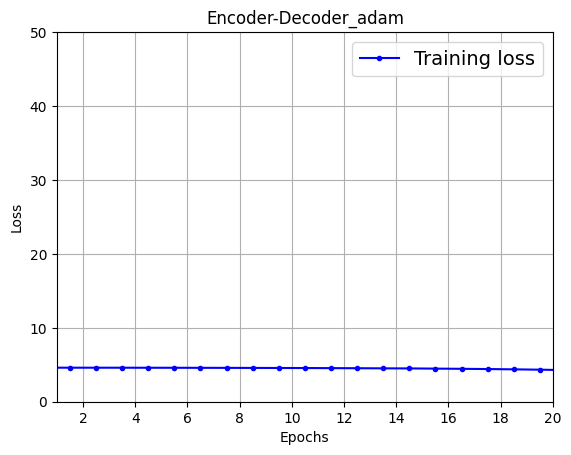

In [88]:
# loss 그래프 시각화
def plot_learning_curves(loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    # plt.plot(np.arange(len(accuracy)) + 1, accuracy, "r.-", label="Accuracy")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 50])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"])
plt.title("Encoder-Decoder_adam")
plt.show()

#### 양방향 RNN

In [89]:
model = keras.models.Sequential([
    keras.layers.GRU(10, return_sequences=True, input_shape=[None, 10]),
    keras.layers.Bidirectional(keras.layers.GRU(10, return_sequences=True))
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, None, 10)          660       
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 20)         1320      
 nal)                                                            
                                                                 
Total params: 1,980
Trainable params: 1,980
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 포지셔널 인코딩
class PositionalEncoding(keras.layers.Layer):
    def __init__(self, max_steps, max_dims, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)
        if max_dims % 2 == 1: max_dims += 1 # max_dims must be even
        p, i = np.meshgrid(np.arange(max_steps), np.arange(max_dims // 2))
        pos_emb = np.empty((1, max_steps, max_dims))
        pos_emb[0, :, ::2] = np.sin(p / 10000**(2 * i / max_dims)).T
        pos_emb[0, :, 1::2] = np.cos(p / 10000**(2 * i / max_dims)).T
        self.positional_embedding = tf.constant(pos_emb.astype(self.dtype))
    def call(self, inputs):
        shape = tf.shape(inputs)
        return inputs + self.positional_embedding[:, :shape[-2], :shape[-1]]

In [91]:
max_steps = 201
max_dims = 512
pos_emb = PositionalEncoding(max_steps, max_dims)
PE = pos_emb(np.zeros((1, max_steps, max_dims), np.float32))[0].numpy()

In [92]:
# 임베딩 정의
embed_size = 512; max_steps = 500; vocab_size = 10000
encoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
decoder_inputs = keras.layers.Input(shape=[None], dtype=np.int32)
embeddings = keras.layers.Embedding(vocab_size, embed_size)


In [93]:
encoder_embeddings = embeddings(encoder_inputs)
decoder_embeddings = embeddings(decoder_inputs)
positional_encoding = PositionalEncoding(max_steps, max_dims=embed_size)
encoder_in = positional_encoding(encoder_embeddings)
decoder_in = positional_encoding(decoder_embeddings)

In [95]:
# 간단한 트랜스포머 (어텐션)
Z = encoder_in
for N in range(6):
    Z = keras.layers.Attention(use_scale=True)([Z, Z])

encoder_outputs = Z
Z = decoder_in
for N in range(6):
    Z = keras.layers.Attention(use_scale=True, causal=True)([Z, Z])
    Z = keras.layers.Attention(use_scale=True)([Z, encoder_outputs])

outputs = keras.layers.TimeDistributed(
    keras.layers.Dense(vocab_size, activation="softmax"))(Z)

In [96]:
K = keras.backend
# 멀티 헤드 어텐션
class MultiHeadAttention(keras.layers.Layer):
    def __init__(self, n_heads, causal=False, use_scale=False, **kwargs):
        self.n_heads = n_heads
        self.causal = causal
        self.use_scale = use_scale
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.dims = batch_input_shape[0][-1]
        self.q_dims, self.v_dims, self.k_dims = [self.dims // self.n_heads] * 3 # could be hyperparameters instead
        self.q_linear = keras.layers.Conv1D(self.n_heads * self.q_dims, kernel_size=1, use_bias=False)
        self.v_linear = keras.layers.Conv1D(self.n_heads * self.v_dims, kernel_size=1, use_bias=False)
        self.k_linear = keras.layers.Conv1D(self.n_heads * self.k_dims, kernel_size=1, use_bias=False)
        self.attention = keras.layers.Attention(causal=self.causal, use_scale=self.use_scale)
        self.out_linear = keras.layers.Conv1D(self.dims, kernel_size=1, use_bias=False)
        super().build(batch_input_shape)
    def _multi_head_linear(self, inputs, linear):
        shape = K.concatenate([K.shape(inputs)[:-1], [self.n_heads, -1]])
        projected = K.reshape(linear(inputs), shape)
        perm = K.permute_dimensions(projected, [0, 2, 1, 3])
        return K.reshape(perm, [shape[0] * self.n_heads, shape[1], -1])
    def call(self, inputs):
        q = inputs[0]
        v = inputs[1]
        k = inputs[2] if len(inputs) > 2 else v
        shape = K.shape(q)
        q_proj = self._multi_head_linear(q, self.q_linear)
        v_proj = self._multi_head_linear(v, self.v_linear)
        k_proj = self._multi_head_linear(k, self.k_linear)
        multi_attended = self.attention([q_proj, v_proj, k_proj])
        shape_attended = K.shape(multi_attended)
        reshaped_attended = K.reshape(multi_attended, [shape[0], self.n_heads, shape_attended[1], shape_attended[2]])
        perm = K.permute_dimensions(reshaped_attended, [0, 2, 1, 3])
        concat = K.reshape(perm, [shape[0], shape_attended[1], -1])
        return self.out_linear(concat)

In [97]:
Q = np.random.rand(2, 50, 512)
V = np.random.rand(2, 80, 512)
multi_attn = MultiHeadAttention(8)
multi_attn([Q, V]).shape

TensorShape([2, 50, 512])

#### openAI GPT 모델 사용
- 셰익스피어 데이터셋

In [ ]:
!pip install transformers
# 설치 필요
from transformers import TFOpenAIGPTLMHeadModel

model = TFOpenAIGPTLMHeadModel.from_pretrained("openai-gpt")

In [72]:
# 토크나이저
from transformers import OpenAIGPTTokenizer

tokenizer = OpenAIGPTTokenizer.from_pretrained("openai-gpt")

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.


In [73]:
prompt_text = "This royal throne of kings, this sceptred isle"
encoded_prompt = tokenizer.encode(prompt_text,
                                  add_special_tokens=False,
                                  return_tensors="tf")
encoded_prompt

<tf.Tensor: shape=(1, 10), dtype=int32, numpy=
array([[  616,  5751,  6404,   498,  9606,   240,   616, 26271,  7428,
        16187]], dtype=int32)>

In [74]:
num_sequences = 5
length = 40

generated_sequences = model.generate(
    input_ids=encoded_prompt,
    do_sample=True,
    max_length=length + len(encoded_prompt[0]),
    temperature=1.0,
    top_k=0,
    top_p=0.9,
    repetition_penalty=1.0,
    num_return_sequences=num_sequences,
)

generated_sequences

<tf.Tensor: shape=(5, 50), dtype=int32, numpy=
array([[  616,  5751,  6404,   498,  9606,   240,   616, 26271,  7428,
        16187,   812,  3493,   246,  1362,   267,   244, 40477,   244,
          595,   589,   498,   481,  2766, 16400,   640, 12356,   500,
          481, 25745,   240,   244,  1805,  2066,   603,  2386,   239,
          244,   481,  3598,   544,   793,   239,   481,  3476,   488,
         3654,   640,  2029,   481, 13700],
       [  616,  5751,  6404,   498,  9606,   240,   616, 26271,  7428,
        16187,  1259,   580,  6340,   557,  1311,   557,   481,  1835,
          759,   788,   239,   568,   249,   937,   249,  1085,   507,
         3125,   485,  1441,   525,  1389,   246,  2363, 12493,   239,
          655,   640,  1311,   834,  1272,  2424,  1694,   240,   488,
          481,  2557,   239,   547, 11857],
       [  616,  5751,  6404,   498,  9606,   240,   616, 26271,  7428,
        16187,   544,   481,  3681,   487,  1063,   604,   694,  9650,
          485

In [75]:
for sequence in generated_sequences:
    text = tokenizer.decode(sequence, clean_up_tokenization_spaces=True)
    print(text)
    print("-" * 80)

this royal throne of kings, this sceptred isle will bear a name! " 
 " not all of the thirty kingdoms are represented in the histories, " tyne said softly. " the south is here. the west and east are within the boundaries
--------------------------------------------------------------------------------
this royal throne of kings, this sceptred isle must be protected as far as the eye can see. but i say i find it difficult to believe that such a area exists. there are far too many deserters, and the war. my sire
--------------------------------------------------------------------------------
this royal throne of kings, this sceptred isle is the excuse he might have been referring to.'
'good night, general,'sparhawk said, then he rose, left the room and went outside. 
'what is it? '
--------------------------------------------------------------------------------
this royal throne of kings, this sceptred isle in the southern sea, this steppe - side barrack with your armed guards at my door.